## Machine Learning Exercise 2
## Group 8

### Task 1

Poisson probability function, 
\begin{equation}\label{eq1}
p(x|\lambda) = \exp(-\lambda) \cdot \frac{\lambda^x}{x!}
\end{equation}
where x = 0,1,2,....,N 
log likelihood function, 
\begin{equation}\label{eq2}
l(\lambda) = \ln \prod_{i=1}^{N}f(x_i|\lambda) 
\end{equation}
\begin{equation}\label{eq3}
l(\lambda) = \sum_{i=1}^{N} \ln(\frac{\exp(-\lambda) \cdot \lambda^x}{x!})
\end{equation}
\begin{equation}\label{eq4}
l(\lambda) = \sum_{i=1}^{N} \ln(\exp(-\lambda)) + \sum_{i=1}^{N} x_i \cdot (\ln(\lambda)) - \sum_{i=1}^{N} \ln(x!) 
\end{equation}
From calculus, a necessary condition for a point $\lambda$ to be a local maximum of l($\lambda$) is,
\begin{equation}\label{eq5}
\frac{\partial l(\lambda)}{\partial \lambda} = 0
\end{equation}
\begin{equation}\label{eq6}
\frac{\partial}{\partial \lambda} (\sum_{i=1}^{N} \ln(\exp(-\lambda)) + \sum_{i=1}^{N} x_i \cdot (\ln(\lambda)) - \sum_{i=1}^{N} \ln(x!)) = 0
\end{equation}
\begin{equation}\label{eq7}
\frac{\partial (-N\cdot \lambda)}{\partial \lambda} + \frac{\partial (\ln (\lambda))\cdot \sum_{i=1}^{N} x_i}{\partial \lambda} - \frac{\partial (\sum_{i=1}^{N} \ln (x_i!))}{\partial \lambda} = 0 
\end{equation}
\begin{equation}\label{eq8}
-n + \frac{1}{\lambda}\cdot \sum_{i=1}^{N} x_i = 0 
\end{equation}
\begin{equation}\label{eq9}
\lambda = \frac{1}{N} \cdot \sum_{i=1}^{N} x_i  
\end{equation}
which is equal to sample mean of N data points.


### Task 2

### A)

$p(x|\mu_1,\mu_2,\sigma_1^2,\sigma_2^2)$ is a probability density function, when the condition $\int_{-\infty}^{\infty} p(x|\mu_1,\mu_2,\sigma_1^2,\sigma_2^2) dx = 1$ is fulfilled. 

Given that $N(x;\mu_1,\sigma_1^2)$ and $N(x;\mu_2,\sigma_2^2)$ are Gaussian functions, it follows that $\int_{-\infty}^{\infty} N(x;\mu_1,\sigma_1^2) dx = \int_{-\infty}^{\infty} N(x;\mu_2,\sigma_2^2) dx = 1$. Applying this to the function $p(x|\mu_1,\mu_2,\sigma_1^2,\sigma_2^2)$ yields:

\begin{align}
\int_{-\infty}^{\infty} p(x|\mu_1,\mu_2,\sigma_1^2,\sigma_2^2) dx = \frac{1}{2} $\int_{-\infty}^{\infty} N(x;\mu_1,\sigma_1^2) dx + \frac{1}{2} \int_{-\infty}^{\infty} N(x;\mu_2,\sigma_2^2) dx = \frac{1}{2} + \frac{1}{2} = 1
\end{align}

As $p(x) > 0$  $\forall x \in \mathbb{R}$ holds for a Gaussian function, it is also necessary for the sum of two Gaussians with positive coefficients.

### B)

The difficulty to find a maximum likelihood solution for $p(x|\mu_1,\mu_2,\sigma_1^2,\sigma_2^2)$ results from the fact that it contains two values of $\mu$ and $\sigma^2$ each. Therefore, the Gaussian statistical model with mean and variance can't be applied.

### Task 3

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

### A)

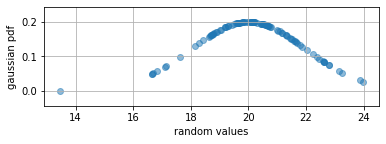

In [8]:
N = 100
mu = 20
variance = 4
sigma = math.sqrt(variance)
s = np.random.normal(mu, sigma, N)
gauss_func = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (s - mu)**2 / (2 * sigma**2))

plt.figure()
plt.subplot(2,1,1)
plt.scatter(s, gauss_func, alpha=0.5)
plt.xlabel('random values')
plt.ylabel('gaussian pdf')
plt.grid()

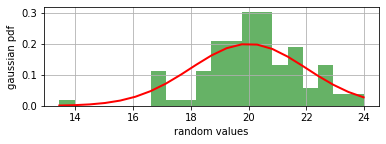

In [9]:
plt.subplot(2,1,2)
count, bins, ignored = plt.hist(s, 20, density=True, alpha=0.6, color='g')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.xlabel('random values')
plt.ylabel('gaussian pdf')
plt.grid()
plt.show()

### B)

Using the equations $\mu = \frac{1}{N} \sum_n x_n$ and $\sigma^2 = \frac{1}{N} \sum_n (x_n - \mu)^2$, the asked values are computed.

In [10]:
# Compute maximum likelihood parameters µ* and sigma^2* for the datapoints generated in Task A.
MLE_mu = (1/N)*(np.sum(s))
MLE_sigma = (1/N)*(np.sum((s - MLE_mu)**2))

print('Maximum likelihood of the mean: ', MLE_mu)
print('Maximum likelihood of the variance :', MLE_sigma)

Maximum likelihood of the mean:  20.184980045419255
Maximum likelihood of the variance : 2.923640213348071


### C)

The computed values do not match the parameters of task A perfectly, because it's a statistical method, which results in the fact, that the computed values will never fully fit to the parameters, but only get closer and closer, the more samples are present.

### D)

With less samples, the fit of the recovered parameters to the parameters from task A gets worse.
With more samples however, the recovered parameters fit to these from task A better.

### Task 4

### A)

\begin{eqnarray}
p_{correct} &=&\sum_{k=1}^{K}p(x\in R_k,c=c_k)\\
&=&\sum_{k=1}^{K}\int_{R_k}p(x,c=c_k)dx\\
&=&\sum_{k=1}^{K}\int_{R_k}p(c=c_k|x)p(x)dx\\
R_k &=& \{x|p(c=c_j|x)>p(c=c_i|x) \forall i \neq j\}
\end{eqnarray}

$p_{correct}$ needs to be maximal. In order to maximize the above sum, we need to maximize each summand. Therefore in each arbitrary chosen region we want to assign the fruit with the highest value of the integral of the posterior probability, since it leads to the highest value. Now since we are able to chose region boundaries freely, we can set them in a way, that we assign one specific fruit to all regions, where its posterior probability is the highest compared to the other fruits.

### B)

It is possible that is is an empty set, because the posterior probability of a specific fruit for all positions x can be smaller than the posterior probability of any other fruit. In this case, the fruit would not get assigned to any region, resulting in an empty set $R_k$.